Enter main.


/usr/lib/python3/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


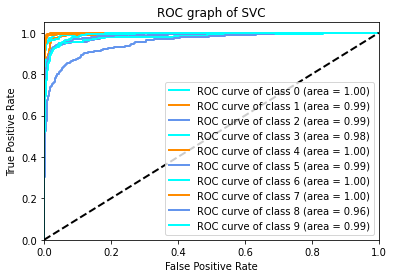

Accuracy:  0.93225
confusion matrix: 
[[391   0   0   0   3   1   1   1   3   0]
 [  0 386   1   1   4   0   1   0   7   0]
 [  0   4 367   5   2   3   7   1   9   2]
 [  5   1  10 356   0  20   0   2   5   1]
 [  0   5   1   0 388   0   1   0   2   3]
 [  3   2   1  25   0 362   1   2   3   1]
 [  4   7   3   0   5   1 380   0   0   0]
 [  1   2   0   0   1   1   0 390   0   5]
 [  6   7   9  10   1  17   1   1 346   2]
 [  1   6   1   2   5   3   0   9  10 363]]
Precision:  0.9323913701166033
Recall:  0.93225


In [2]:
import data
import numpy as np
# Import pyplot - plt.imshow is useful!
from sklearn.model_selection import KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

def labels_to_one_hot(labels):
    targets = []
    for lbl in labels:
        a = [0.]*10
        a[int(lbl)] = 1.
        targets.append(a)
    return np.array(targets)

def plot_roc(y_test, y_score):
    n_classes = 10
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= n_classes

    lw = 2
    plt.figure()

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC graph of SVC')
    plt.legend(loc="lower right")
    plt.show()

def main():
    print("Enter main.")
    train_data, train_labels, test_data, test_labels = data.load_all_data('data')

    clf = LinearSVC(random_state=0, tol=1e-5)
    clf.fit(train_data, train_labels)

    prediction = clf.predict(test_data)
    # prediction_oh = clf.predict_proba(test_data)  # (#, 10), for each
    # prediction_oh = clf.predict(test_data)
    prediction_oh = clf.decision_function(test_data)
    y_test = labels_to_one_hot(test_labels)

    plot_roc(y_test, prediction_oh)

    print("Accuracy: ", clf.score(test_data, test_labels))
    print("confusion matrix: ")
    print(confusion_matrix(test_labels, prediction))
    print("Precision: ", precision_score(test_labels, prediction, average='macro'))
    print("Recall: ", recall_score(test_labels, prediction, average='macro'))


if __name__ == '__main__':
    main()
